# PCA (Principal Component Analysis)

# Goal of PCA:
Reduce dimensionality of data while preserving maximum variance.

# How does it work?

1. Standardize the data (zero mean).
2. Compute the covariance matrix.
3. Compute eigenvalues and eigenvectors of the covariance matrix.
4. Sort eigenvectors by eigenvalue (variance).
5. Project data onto top-k eigenvectors.




# [code#1] PCA using Numpy

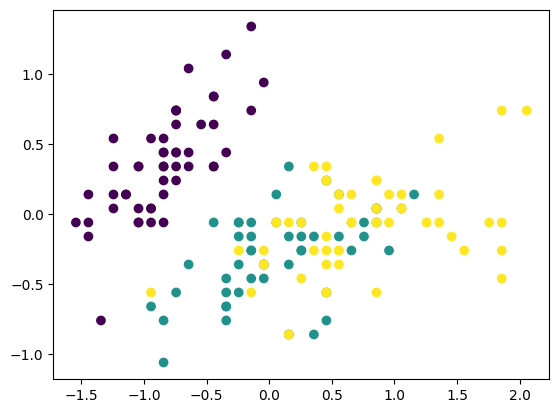

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 1: Load and prepare data
X = load_iris().data  # shape (150, 4)

X_meaned = X - np.mean(X, axis=0)  # Centering the data
# plot X_meaned
plt.scatter(X_meaned[:,0], X_meaned[:,1], c=load_iris().target)
plt.show()

In [14]:
# Step 2: Compute covariance matrix (shape will be 4x4)
# Covariance matrix: (X_meaned^T * X_meaned) / (n - 1)

cov_matrix = (X_meaned.T @ X_meaned)/(X_meaned.shape[0] - 1)
# cov_matrix = np.cov(X_meaned, rowvar=False) # directly using numpy

cov_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [31]:
# Step 3: Eigen decomposition

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(f"{eigenvalues}")
print(f"{eigenvectors}")

[0.02383509 0.0782095  0.24267075 4.22824171]
[[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


In [33]:
# Step 4: Sort eigenvalues and eigenvectors in descending order

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvectors

array([[-0.36138659,  0.65658877,  0.58202985,  0.31548719],
       [ 0.08452251,  0.73016143, -0.59791083, -0.3197231 ],
       [-0.85667061, -0.17337266, -0.07623608, -0.47983899],
       [-0.3582892 , -0.07548102, -0.54583143,  0.75365743]])

In [53]:
# Step 5: Select top k eigenvectors (say k=2)

k = 2
eigenvectors_subset = eigenvectors[:, :k]

eigenvectors_subset

array([[-0.36138659,  0.65658877],
       [ 0.08452251,  0.73016143],
       [-0.85667061, -0.17337266],
       [-0.3582892 , -0.07548102]])

In [54]:
# Step 6: Project data onto selected components

X_reduced = np.dot(X_meaned, eigenvectors_subset)

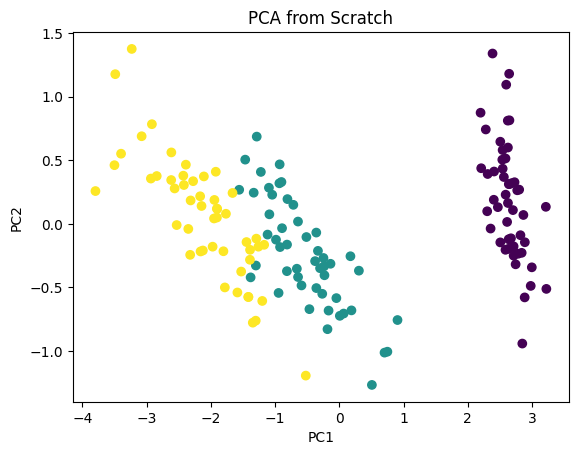

In [56]:
# Plot the reduced data

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=load_iris().target)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA from Scratch")
plt.show()

## for K=3

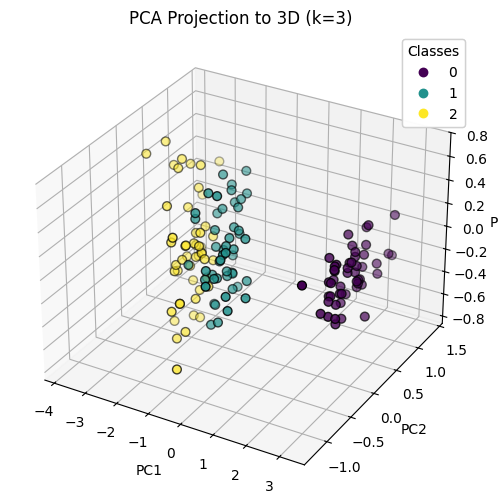

In [58]:
k = 3
eigenvectors_subset = eigenvectors[:, :k]
X_reduced = np.dot(X_meaned, eigenvectors_subset)

# Step 7: Visualize the reduced 3D data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], 
                     c=load_iris().target, cmap='viridis', edgecolor='k', s=40)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title("PCA Projection to 3D (k=3)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# [code#2] PCA using sklearn.decompositions

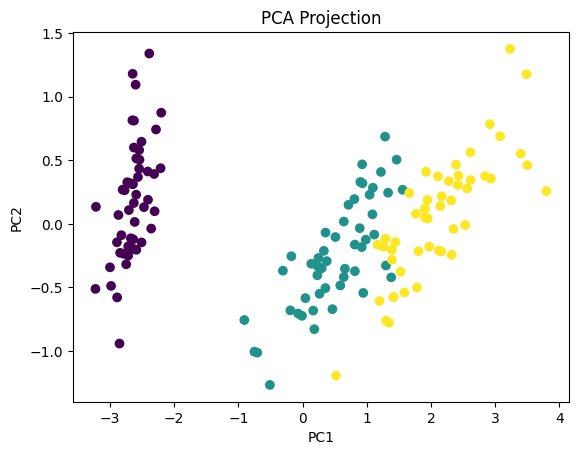

PCA Components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [59]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X = load_iris().data
y = load_iris().target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

# Eigenvectors (principal components)
print("PCA Components:\n", pca.components_)  # these are eigenvectors

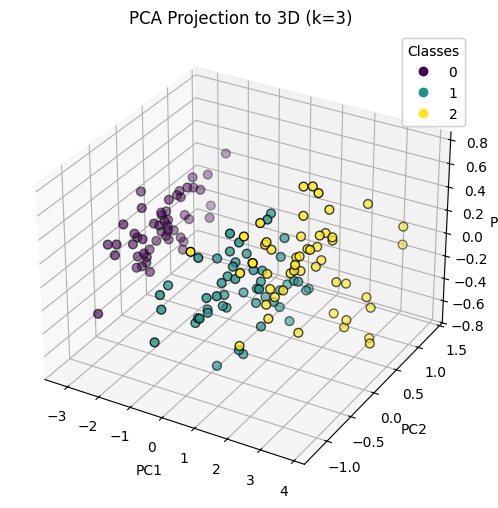

In [60]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                     c=load_iris().target, cmap='viridis', edgecolor='k', s=40)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title("PCA Projection to 3D (k=3)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()